### **Employee Retention Project**

In [211]:
### Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics

### Load dataset

In [9]:
file_path = "data/HR_capstone_dataset.csv"
data = pd.read_csv(file_path)

In [21]:
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration (Initial EDA and data cleaning)


### Gather basic information about the data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [48]:
data.shape

(14999, 10)

In [51]:
data.size

149990

### Gather descriptive statistics about the data

In [31]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [34]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [69]:
data = data.rename(columns = {
    "Work_accident": "work_accident",
    "average_montly_hours": "average_monthly_hours",
    "time_spend_company": "tenure",
    "Department": "department"
})

Adjusted the misspelling and updated the column names as needed.

### Check missing values


In [73]:
data.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in dataset.

### Checking duplicates

In [77]:
data.duplicated().sum()

3008

3008 rows contains duplicates. This is %20 of the dataset.

In [80]:
data_filtered = data.drop_duplicates(keep = "first")

data_filtered.shape

(11991, 10)

In [82]:
data_filtered.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers


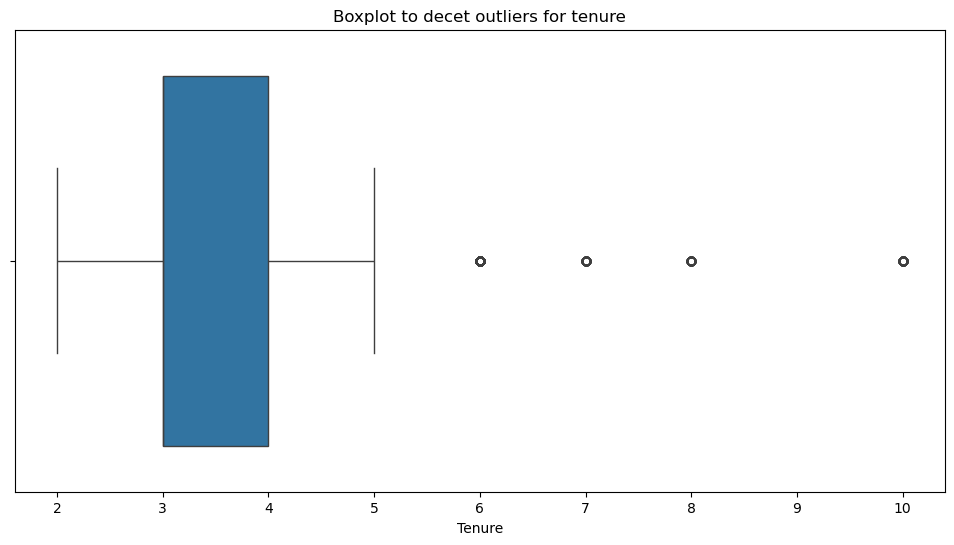

In [94]:
plt.figure(figsize = (12,6))
sns.boxplot(x = data_filtered["tenure"])
plt.title("Boxplot to decet outliers for tenure")
plt.xlabel("Tenure")
plt.show()

In [106]:
# Compute the 25th percentile value in `tenure`
percentile25 = data_filtered['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = data_filtered['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = data_filtered[(data_filtered['tenure'] > upper_limit) | (data_filtered['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


As we are using an XGBoost decision tree model, there is no need to eliminate outliers, because decision tree models are not sensitive to outliers or large value differences.

## Data Exploration (Continue EDA)


Numbers of people stayed or left.

In [109]:
print(data_filtered["left"].value_counts())

left
0    10000
1     1991
Name: count, dtype: int64


Percantage of people stayed or left.

In [111]:
print(data_filtered["left"].value_counts(normalize = True))

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## Data Visualization

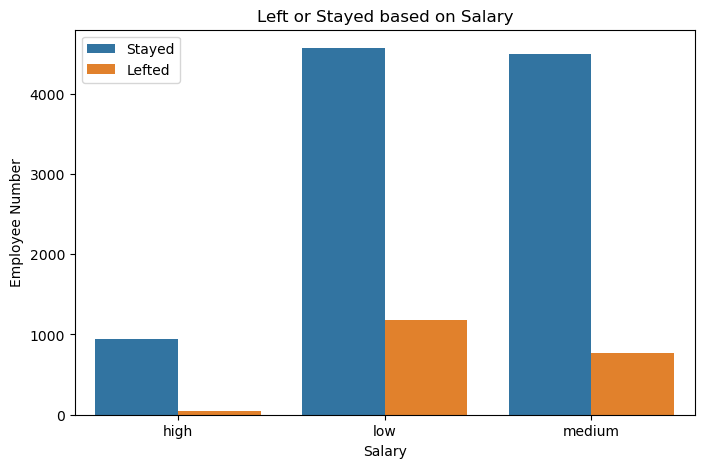

In [117]:
left_counts_by_salary = data_filtered.groupby(["salary","left"]).size().reset_index(name ="count")
left_counts_by_salary["left"] = left_counts_by_salary["left"].replace({
    0: "Stayed",
    1: "Lefted"
})
plt.figure(figsize=(8,5))
sns.barplot(x="salary", y="count", hue = "left", data = left_counts_by_salary)
plt.title("Left or Stayed based on Salary")
plt.xlabel("Salary")
plt.ylabel("Employee Number")
plt.legend()
plt.show()

In [135]:
total_counts = left_counts_by_salary.groupby("salary")["count"].transform("sum")
left_counts_by_salary["percentage"] = (left_counts_by_salary["count"] / total_counts) * 100
left_counts_by_salary

,salary,left,count,percentage
0,high,Stayed,942,95.151515
1,high,Lefted,48,4.848485
2,low,Stayed,4566,79.547038
3,low,Lefted,1174,20.452962
4,medium,Stayed,4492,85.383007
5,medium,Lefted,769,14.616993


Based on the DataFrame above, employees with low salaries are more likely to leave the job, while those with high salaries are less likely to do so.

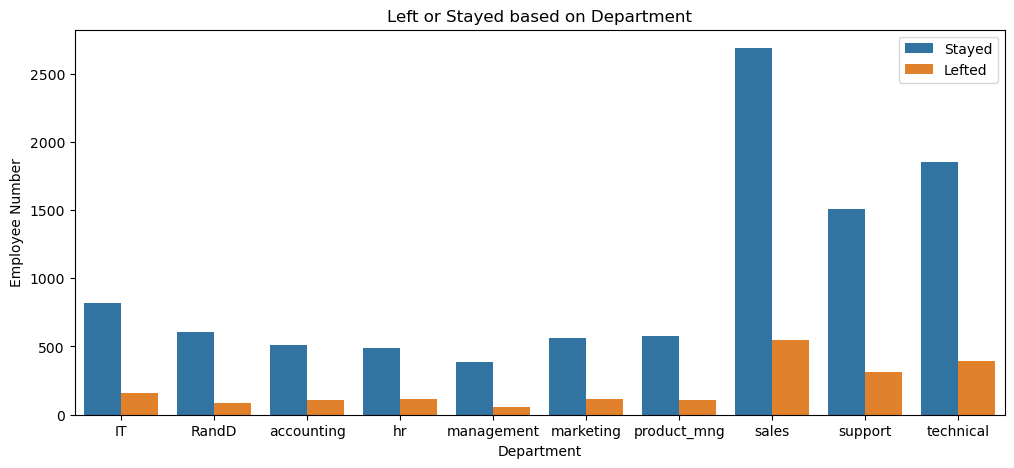

In [144]:
left_counts_by_department = data_filtered.groupby(["left","department"]).size().reset_index(name = "count")

total_counts = left_counts_by_department.groupby("department")["count"].transform("sum")

left_counts_by_department["percantage"] = (left_counts_by_department["count"] / total_counts) * 100

left_counts_by_department.left = left_counts_by_department["left"].replace({
    1:"Lefted",
    0:"Stayed"
})
plt.figure(figsize = (12,5))
sns.barplot(x="department", y = "count", hue = "left", data = left_counts_by_department)
plt.title("Left or Stayed based on Department")
plt.xlabel("Department")
plt.ylabel("Employee Number")
plt.legend()
plt.show()

In [150]:
left_counts_by_department.sort_values(by = "percantage", ascending = False).reset_index(drop=True)

,left,department,count,percantage
0,Stayed,management,384,88.073394
1,Stayed,RandD,609,87.752161
2,Stayed,product_mng,576,83.965015
3,Stayed,IT,818,83.811475
4,Stayed,marketing,561,83.358098
5,Stayed,sales,2689,83.019450
6,Stayed,support,1509,82.866557
7,Stayed,technical,1854,82.620321
8,Stayed,accounting,512,82.447665
9,Stayed,hr,488,81.198003


<Axes: xlabel='average_monthly_hours', ylabel='count'>

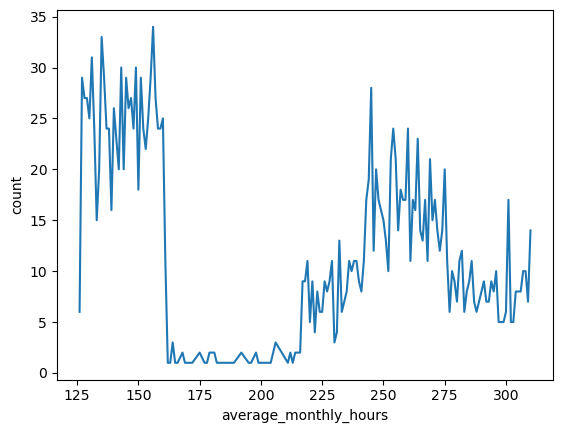

In [160]:
left_only = data_filtered[data_filtered["left"] == 1]
left_rate_by_montly_hours = left_only.groupby(["left", "average_monthly_hours"]).size().reset_index(name="count")

sns.lineplot(x="average_monthly_hours", y = "count", data = left_rate_by_montly_hours)

In [190]:
mask = data_filtered["tenure"] > data_filtered["tenure"].mean()
data_filtered[mask]["left"].value_counts()

left
0    2805
1    1086
Name: count, dtype: int64

In [192]:
data_filtered[~mask]["left"].value_counts()

left
0    7195
1     905
Name: count, dtype: int64

As shown in the DataFrames above, employees who spent more time at the company (as indicated by the tenure column) are more likely to leave.

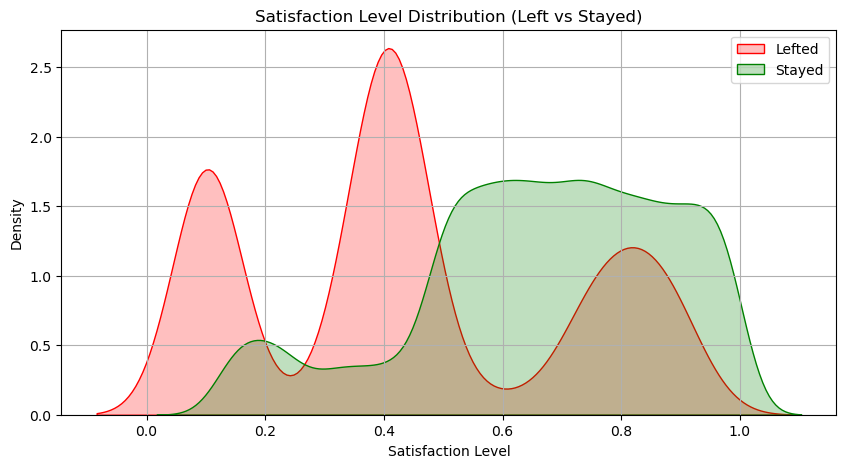

In [175]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=data_filtered[data_filtered["left"] == 1], x="satisfaction_level", label="Lefted", fill=True, color="red")
sns.kdeplot(data=data_filtered[data_filtered["left"] == 0], x="satisfaction_level", label="Stayed", fill=True, color="green")

plt.title("Satisfaction Level Distribution (Left vs Stayed)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

As distribution shows above, the satisfaction level increases with the probabilty of stay as a employee.

In [182]:
numeric_data = data_filtered.select_dtypes(include = "number")
cols = list(numeric_data.columns)
i, j = cols.index("left"), cols.index("satisfaction_level")
cols[i], cols[j] = cols[j], cols[i]
numeric_data = numeric_data[cols]

In [184]:
corr_matrix = numeric_data.corr()

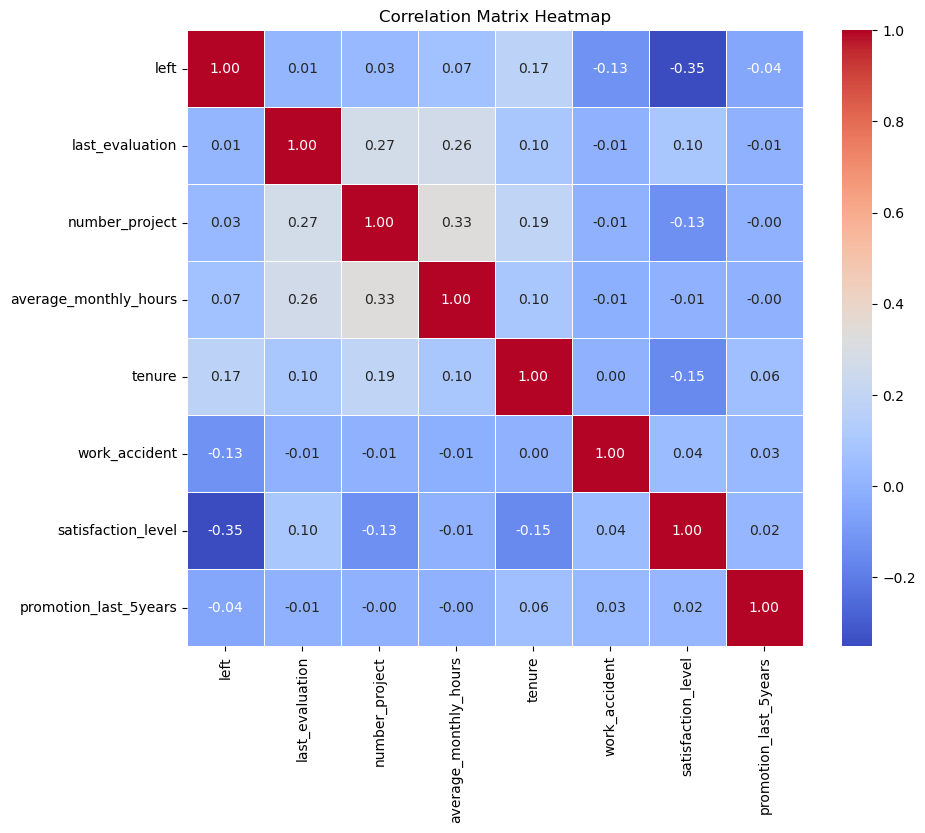

In [186]:
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", square = True, linewidth= 0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

## Model Building

Isolating the outcome variable from the dataset.

In [196]:
y = data_filtered.left

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [202]:
X = data_filtered.copy()

X = X.drop("left", axis = 1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


As we see in the DataFrame above, there are object data types to handle before splitting the dataset.

In [205]:
# Dummy encode the "department" and "salary" column
X = pd.get_dummies(X)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False


In [207]:
X.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_monthly_hours       int64
tenure                      int64
work_accident               int64
promotion_last_5years       int64
department_IT                bool
department_RandD             bool
department_accounting        bool
department_hr                bool
department_management        bool
department_marketing         bool
department_product_mng       bool
department_sales             bool
department_support           bool
department_technical         bool
salary_high                  bool
salary_low                   bool
salary_medium                bool
dtype: object

In [209]:
# Splitting the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

In [229]:
#Constructing a decision tree model
tree = DecisionTreeClassifier(random_state = 0)
cv_params = {
    "max_depth": [2,4,6,None],
    "min_samples_leaf": [1,2,5],
    "min_samples_split":[2,4,6]
}
scoring = ["recall", "f1", "precision", "accuracy"]
tree_cv = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = "f1")

In [231]:
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [2, 4, 6, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 4, 6]},
             refit='f1', scoring=['recall', 'f1', 'precision', 'accuracy'])

In [233]:
# Check best f1 score on CV
tree_cv.best_score_

0.9419750316851789

In [235]:
# check best params
tree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [237]:
#Testing the decision tree model
y_pred = tree_cv.predict(X_test)

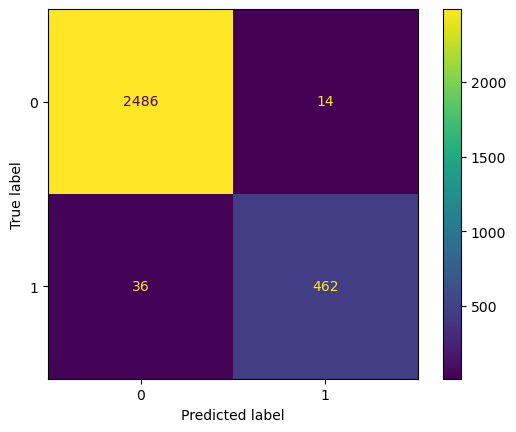

In [239]:
#Compute values for confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = tree_cv.classes_)
#Cretae display of confusion matrix
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = tree_cv.classes_)
#Plot confusion matrix
cm_disp.plot(values_format = "")

#Display Plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

In [246]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = metrics.roc_auc_score(y_test_data, preds)
    accuracy = metrics.accuracy_score(y_test_data, preds)
    precision = metrics.precision_score(y_test_data, preds)
    recall = metrics.recall_score(y_test_data, preds)
    f1 = metrics.f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [248]:
tree_cv_test_scores = get_scores("Decision Tree test", tree_cv, X_test, y_test)
tree_cv_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Decision Tree test,0.970588,0.927711,0.948665,0.983322,0.961055


In [250]:
tree_cv_importances = pd.DataFrame(tree_cv.best_estimator_.feature_importances_,
                                   columns = ["gini_importance"],
                                   index = X.columns
                                  )
tree_cv_importances = tree_cv_importances.sort_values(by = "gini_importance", ascending = False)

#Only extract the features with importances > 0 
tree_cv_importances = tree_cv_importances[tree_cv_importances["gini_importance"] != 0]
tree_cv_importances

,gini_importance
satisfaction_level,0.499285
last_evaluation,0.170128
number_project,0.132323
tenure,0.120307
average_monthly_hours,0.076705
department_technical,0.001003
salary_low,0.000150
department_sales,0.000099


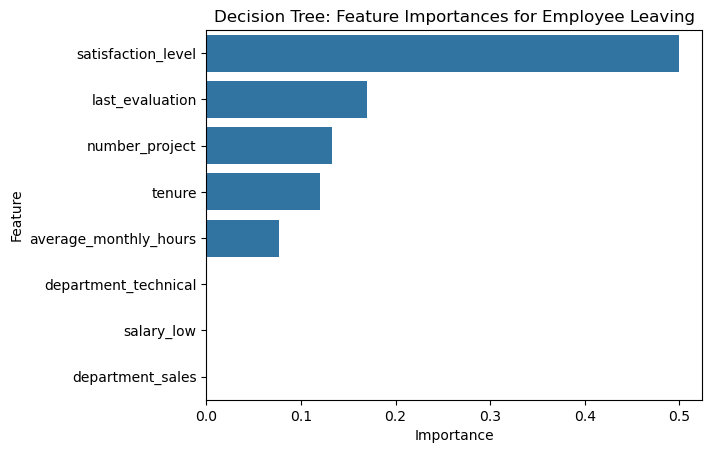

In [252]:
sns.barplot(data=tree_cv_importances, x="gini_importance", y=tree_cv_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score. 

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 96.1%, precision of 97.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 